# Sentiment analysis

Extract sentiment from a text, usually in terms of polarity:
 - positive polarity: good sentiment: approval
 - negative polarity: bad sentiment: disapproval
 
Workds well for reviews. Not so much for literature.

Several libraries for sentiment analysis:

 - lexical: uses a dictionary (fabulous! + 2, terrible - 2)
     - "not terrible!" < -2 not 0? 0.5?
     - Negation propagation
 
 - machine-learning approaches
     - performs slightly better
     
VADER: lexical, some negation propagation - very much dealing with social media 21st century text

 - "a bomb" <- bad
 - "the bomb" <- good
 
TextBlob: an nltk light

In [33]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pandas as pd

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/james/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/james/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/james/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/james/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [12]:
sentimentAnalyzer.polarity_scores('that was really really terrible and I hated it!!')

{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.8664}

In [13]:
def getSentiment(text):
    return sentimentAnalyzer.polarity_scores(text)['compound']

In [14]:
dubliners = open('../Readings/content/texts/dubliners.md').read()

In [15]:
dublinersStories = dubliners.split('\n##')

In [16]:
dublinersStories[2][:200]

' AN ENCOUNTER\n\nIT WAS Joe Dillon who introduced the Wild West to us. He had a little\nlibrary made up of old numbers of The Union Jack, Pluck and The\nHalfpenny Marvel. Every evening after school we met'

In [17]:
eveline = dublinersStories[4]

In [18]:
evelineParas = eveline.split('\n\n')

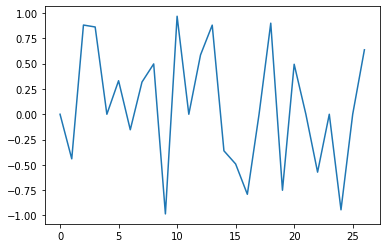

In [19]:
pd.Series([getSentiment(para) for para in evelineParas]).plot()

In [20]:
evelineSents = nltk.sent_tokenize(eveline)

In [21]:
evelineSentiments = pd.Series([getSentiment(sentence) for sentence in evelineSents])

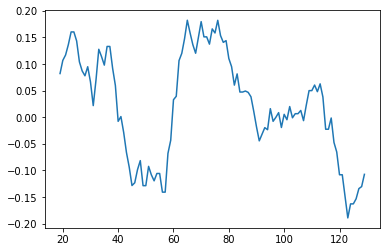

In [22]:
evelineSentiments.rolling(20).mean().plot()

In [23]:
for sentiment, sent in zip(evelineSentiments[63:75], evelineSents[63:75]):
    print(sentiment, sent.replace('\n', ' '))

0.0 He had tales of distant countries.
0.0 He had started as a deck boy at a pound a month on a ship of the Allan Line going out to Canada.
0.0 He told her the names of the ships he had been on and the names of the different services.
-0.4767 He had sailed through the Straits of Magellan and he told her stories of the terrible Patagonians.
0.0516 He had fallen on his feet in Buenos Ayres, he said, and had come over to the old country just for a holiday.
-0.4215 Of course, her father had found out the affair and had forbidden her to have anything to say to him.
0.0 "I know these sailor chaps," he said.
0.5859 One day he had quarrelled with Frank and after that she had to meet her lover secretly.
0.0 The evening deepened in the avenue.
0.0 The white of two letters in her lap grew indistinct.
0.0 One was to Harry; the other was to her father.
0.5719 Ernest had been her favourite but she liked Harry too.


In [24]:
sentimentAnalyzer = SentimentAnalyzer()

NameError: name 'SentimentAnalyzer' is not defined

# Macro-Etymological analysis

kingly - royal - regal

 ^                ^
 - Germanic       - latin
 
          ^
          -  French
          
Medical terms from French or Latin. Gives gravity - 
          

In [ ]:
import macroetym



In [ ]:
macroetym.main.Text

In [43]:
sisters = dublinersStories[1]
araby = dublinersStories[3]

In [44]:
evelineText = macroetym.main.Text(eveline)
sistersText = macroetym.main.Text(sisters)
arabyText = macroetym.main.Text(araby)

In [34]:
evelineText.prettyStats

{'Old English (ca. 450-1100)': 61.21,
 'Latin': 6.51,
 'Old French (842-ca. 1400)': 12.64,
 'German': 0.37,
 'Anglo-Norman': 6.13,
 'Old Norse': 4.09,
 'Hebrew': 0.37,
 'French': 4.74,
 'Arabic': 0.19,
 'Middle Dutch (ca. 1050-1350)': 0.37,
 'Middle French (ca. 1400-1600)': 2.32,
 'Ancient Greek (to 1453)': 0.74,
 'Italian': 0.19,
 'Persian': 0.12}

In [46]:
etymData = { "sisters" : sistersText.prettyStats, 
             "eveline": evelineText.prettyStats,
             "araby": arabyText.prettyStats }

In [48]:
pd.DataFrame(etymData)

sisters  eveline  araby
Old English (ca. 450-1100)       48.76    61.21  54.12
Middle French (ca. 1400-1600)     2.94     2.32   2.14
Old Norse                         4.81     4.09   2.50
Old French (842-ca. 1400)        20.61    12.64  18.46
Latin                            10.03     6.51   8.38
Anglo-Norman                      7.40     6.13   8.43
Hebrew                            0.62     0.37    NaN
Ancient Greek (to 1453)           0.50     0.74   0.56
French                            3.23     4.74   3.51
Middle Low German                 0.08      NaN    NaN
Arabic                            0.12     0.19   0.56
Spanish                           0.25      NaN    NaN
Italian                           0.44     0.19   0.35
Welsh                             0.12      NaN    NaN
Persian                           0.08     0.12    NaN
German                             NaN     0.37    NaN
Middle Dutch (ca. 1050-1350)       NaN     0.37   0.28
Dutch                              NaN      NaN   0.56
Aragonese                          NaN      NaN   0.14

In [49]:
familyData = { "sisters" : sistersText.familyStats(), 
             "eveline": evelineText.familyStats(),
             "araby": arabyText.familyStats() }

In [50]:
pd.DataFrame(familyData)

sisters    eveline      araby
Germanic      53.648425  66.047088  57.462335
Latinate      44.900498  32.527881  41.266478
Semitic        0.746269   0.557621   0.564972
Hellenic       0.497512   0.743494   0.564972
Other          0.124378        NaN   0.141243
Indo-Iranian   0.082919   0.123916   0.000000
Celtic         0.000000   0.000000   0.000000
Turkic         0.000000   0.000000   0.000000
Austronesian   0.000000   0.000000   0.000000
Balto-Slavic   0.000000   0.000000   0.000000
Uralic         0.000000   0.000000   0.000000
Japonic        0.000000   0.000000   0.000000

In [51]:
from nltk.corpus import brown

In [53]:
brownWords = { cat: brown.words(categories=cat) for cat in brown.categories() }

In [57]:
def detokenize(wordList):
    words = [word for word in wordList if word.isalpha()]
    return ' '.join(words)

In [58]:
brownTexts = { cat: detokenize(words) for cat, words in brownWords.items() }

In [61]:
brownEtyms = { cat: macroetym.main.Text(text).familyStats() for cat, text in brownTexts.items()}

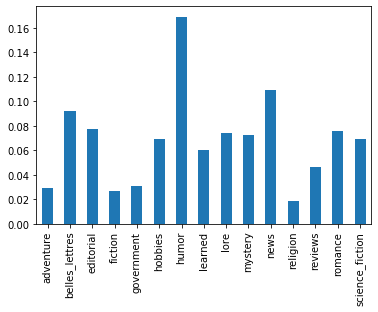

In [70]:
 pd.DataFrame(brownEtyms).T['Celtic'].plot(kind='bar')